Saving city_day.csv to city_day (3).csv
Missing Values Before Cleaning:

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

✅ Model Evaluation:
Train R² Score: 0.9237
Test R² Score: 0.8752
Mean Squared Error (Test): 2284.86


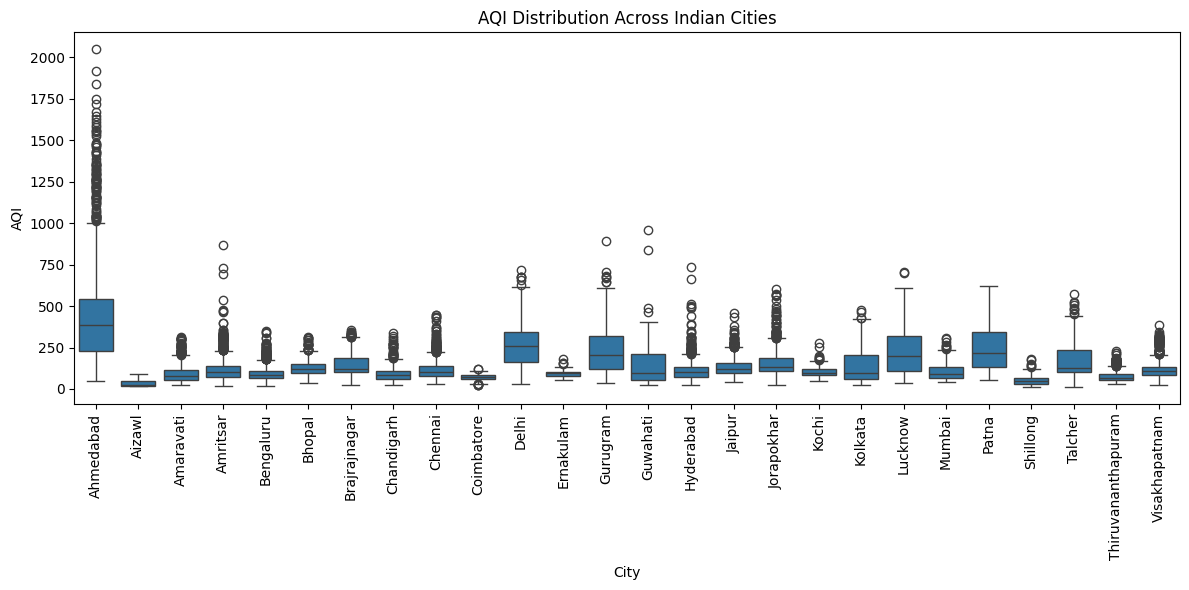

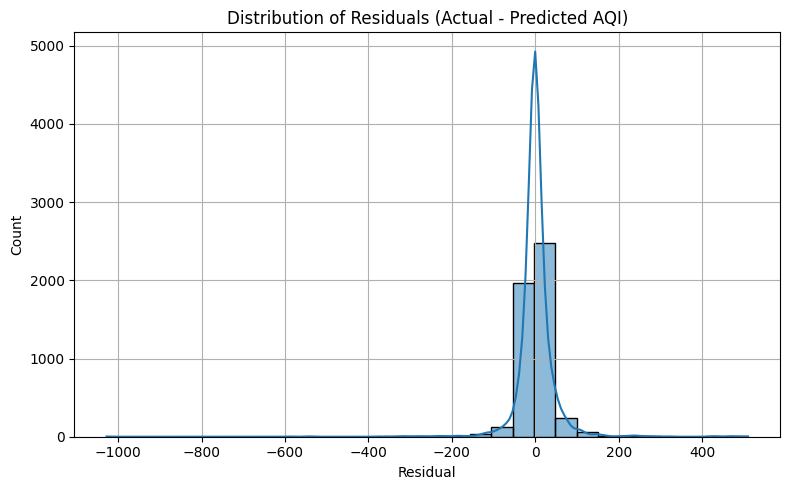

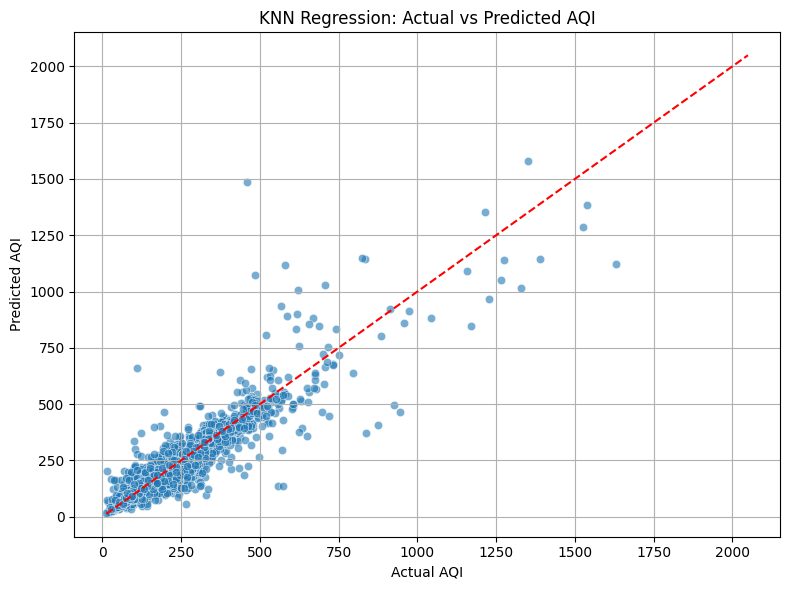

In [4]:
# Imports and File Upload
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Upload dataset
uploaded = files.upload()

# Load dataset
data = pd.read_csv('city_day.csv')

# Report missing values before cleaning
print("Missing Values Before Cleaning:\n")
print(data.isnull().sum())

# Data Preprocessing
# Drop rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Fill remaining missing numeric values with column means
data = data.fillna(data.mean(numeric_only=True))

# Define pollutant features
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO',
              'SO2', 'O3', 'NH3', 'Benzene', 'Toluene', 'Xylene']

# Feature & Target Separation
X = data[pollutants]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Train performance
y_train_pred = knn.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)

print("\n✅ Model Evaluation:")
print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")
print(f"Mean Squared Error (Test): {mse_test:.2f}")

# Boxplot of AQI across Cities
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='AQI', data=data)
plt.xticks(rotation=90)
plt.title("AQI Distribution Across Indian Cities")
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (Actual - Predicted AQI)")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted AQI Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("KNN Regression: Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()